<a href="https://colab.research.google.com/github/Okeezodumu/Natural-language-processing/blob/main/My_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this assignment is to perform sentiment analysis on product reviews to evaluate customer satisfaction across three key categories: Please use the revie body column.
Students will extract relevant sentences from the review dataset that mention these aspects and classify them into sentiment using VADER.:
Customer reviews often contain insights on various aspects of a product. This assignment focuses on analyzing sentiments surrounding:
– How well the product fits or feels when in use (headphones, earbuds, wearables, etc.).
– Overall build quality, durability, and performance of the product.
– Customer experiences related to product charging, battery performance, or charger issues.
Students will extract sentences containing specific keywords and analyze sentiment patterns to identify areas where the product excels or needs improvement.::
Load the product review dataset.
:
Students will filter reviews based on keywords linked to each category:
: fit, fitting, comfortable, tight, loose, wearable
: quality, durable, broken, sturdy, damage, build
: charge, charging, charged, charger, battery, power
:
For each category, extract sentences from reviews that contain the relevant keywords.
Ensure that partial matches (like "charging" or "charged") are captured.
:
Use VADER (Valence Aware Dictionary and sEntiment Reasoner) to perform sentiment analysis on the extracted sentences.
Classify the sentences as:
(compound score > 0.05)
(compound score between -0.05 and 0.05)
(compound score < -0.05)
:
Plot sentiment distributions for each category (Fit, Quality, Charging) using bar charts.
Summarize the overall sentiment trends for each category and highlight areas with predominantly negative feedback.
:A that:
Extracts relevant sentences based on category keywords.
Applies VADER sentiment analysis to classify sentiment.
Visualizes sentiment distributions across categories.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()

from matplotlib import pyplot as plt

In [ ]:
data=pd.read_csv('AllProductReviews.csv')

In [ ]:
data.head(2)

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255


In [ ]:
print(data.shape)   #size of dataset
print(f"The size of the data is  {data.shape}")
print(f"The individual review information is \n {data.ReviewBody.value_counts()} ")
print(data.ReviewBody.unique())

(14337, 4)
The size of the data is  (14337, 4)
The individual review information is 
 ReviewBody
Good\n                                                                                                                                                                                                                                                                                          242
Good product\n                                                                                                                                                                                                                                                                                   77
Nice\n                                                                                                                                                                                                                                                                                           71
Awesome\n                  

In [ ]:
sent_i = SentimentIntensityAnalyzer() #create a snetiment analysis object

In [ ]:
sent_i.polarity_scores('The battery is bad')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [ ]:
sent_i.polarity_scores('The battery is bad')['compound']

-0.5423

In [ ]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

In [ ]:
happy_score=vadar_sentiment('I am satisfied with the charger')
print(happy_score)

0.4215


In [ ]:
neutral_score=vadar_sentiment('The battery is really average')
print(neutral_score)

0.0


In [ ]:
sad_score=vadar_sentiment('The headphone strap is loose')
print(sad_score)

-0.3182


In [ ]:
# create new column for vadar compound sentiment score
data['ReviewBody']=data['ReviewBody'].astype(str)
data['vadar compound'] = data['ReviewBody'].progress_apply(vadar_sentiment)

100%|██████████| 14337/14337 [00:02<00:00, 4849.60it/s]


In [ ]:
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,vadar compound,vadar sentiment
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,-0.9435,negative
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,-0.5875,negative
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.5569,positive
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.1779,positive
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.4854,positive


In [ ]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1)
        or neutral (0) based on given thresholds """
    if sentiment <= neg_threshold:
        label = 'negative'
    elif sentiment >= pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
data['vadar sentiment'] = data['vadar compound'].apply(categorise_sentiment)

In [ ]:
data.head(10)

,ReviewTitle,ReviewBody,ReviewStar,Product,vadar compound,vadar sentiment
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,-0.9435,negative
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,-0.5875,negative
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.5569,positive
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.1779,positive
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.4854,positive
5,Charging port not working\n,"After 11 days, the charging port isn't working...",1,boAt Rockerz 255,0.5122,positive
6,Loved the color and sound !!\n,Sound-4.5/5Build quality-4.5/5Battery life -4/...,4,boAt Rockerz 255,0.9801,positive
7,Great sound with worst mic.\n,After one month usage reviewing this .Pros-1- ...,3,boAt Rockerz 255,-0.5849,negative
8,Battery life is good enough to keep going all ...,I can’t get enough of this earphone! The bass ...,5,boAt Rockerz 255,0.9685,positive
9,Very very bad Durabity\n,The product durability is 1 month..I just lost...,1,boAt Rockerz 255,-0.6076,negative


<ipython-input-43-be16fd343b7c>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)


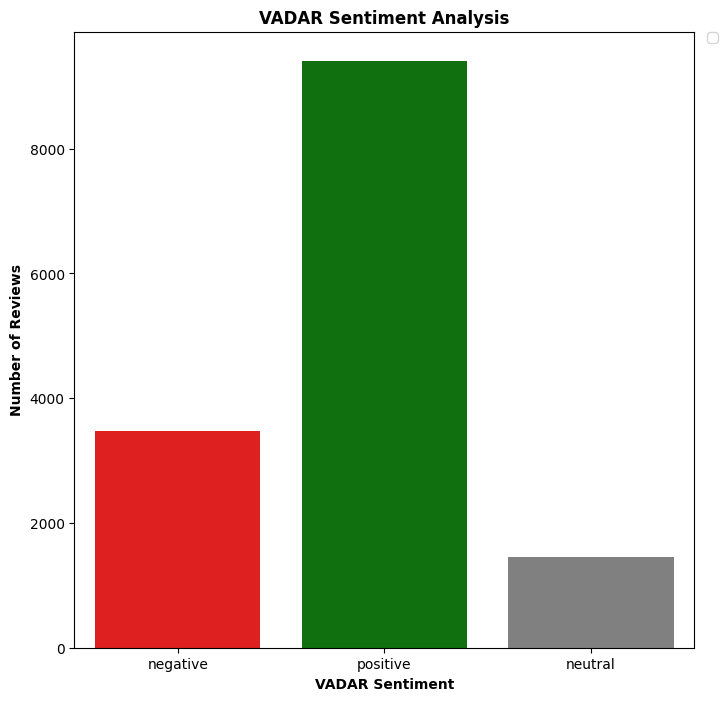

In [ ]:
# plot distribution of article sentiments for each company

palette ={"positive": "green", "neutral": "grey", "negative": "red"}
plt.figure(figsize=(8,8))
sns.countplot(x='vadar sentiment', data=data, hue='vadar sentiment', palette=palette)
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Number of Reviews', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
# Filter out only positive reviews
positive_reviews = data[data['vadar sentiment'] == 'positive']

#Count positive reviews per company
positive_count = positive_reviews['vadar sentiment'].value_counts()
print(positive_count)
# Count total reviews per company

vadar sentiment
positive    9404
Name: count, dtype: int64


In [ ]:
# Filter out only positive reviews
neutral_reviews = data[data['vadar sentiment'] == 'neutral']

#Count positive reviews per company
neutral_count = neutral_reviews['vadar sentiment'].value_counts()
print(neutral_count)
# Count total reviews per company

vadar sentiment
neutral    1456
Name: count, dtype: int64


In [ ]:
# Filter out only positive reviews
negative_reviews = data[data['vadar sentiment'] == 'negative']

#Count positive reviews per company
negative_count = negative_reviews['vadar sentiment'].value_counts()
print(negative_count)
# Count total reviews per company

vadar sentiment
negative    3477
Name: count, dtype: int64
